# TIME SERIES

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 

import matplotlib
matplotlib.rc('xtick', labelsize=40) 
matplotlib.rc('ytick', labelsize=40) 

import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
from statsmodels.tsa.stattools import acf, pacf

If a time series mean, variance and covariance with past and future values do not change over time then the model is known to be **covariance stationary**

**White noise** is a process where time series process has a zero mean, constant variance and no serial correlation between data points

### ACF vs PACF

ACF is an (complete) auto-correlation function which gives us values of auto-correlation of any series with its lagged values. 

PACF is a partial auto-correlation function. Basically instead of finding correlations of present with lags like ACF, it finds correlation of the residuals 

##### Auto regressive (AR) process 

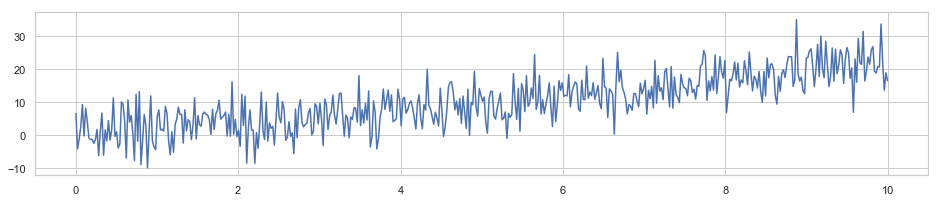

In [18]:
t = np.linspace(0, 10, 500)
#normal distributed values
ys = np.random.normal(0,5,500)
#exponential series to get the trend
ye = np.exp(t**0.5)
#adding normally distributed series in exponential series
y = ys+ye
#plot
plt.figure(figsize=(16,3))
plt.plot(t,y)

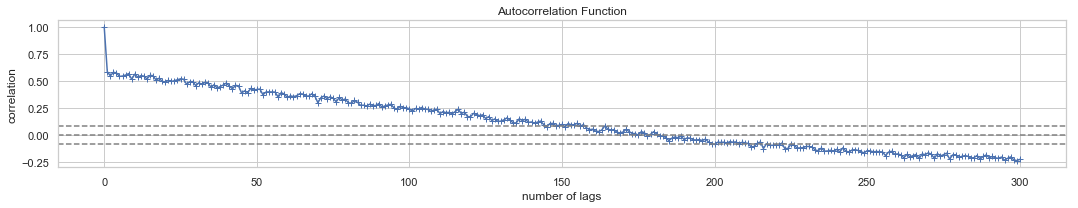

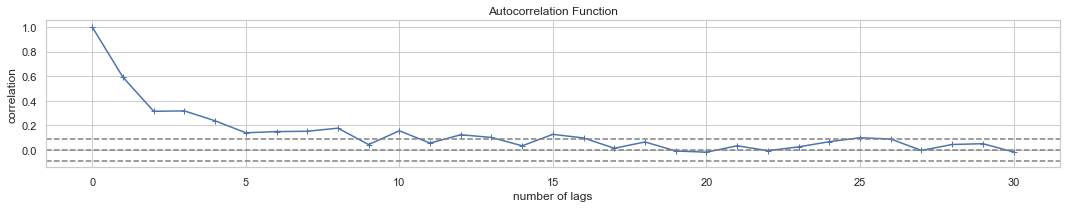

In [17]:
#calling auto correlation function
lag_acf = acf(y, nlags=300)
lag_pacf = pacf(y, nlags=30, method='ols')
#Plot PACF:
for i in [lag_acf,lag_pacf]:
    plt.figure(figsize=(15,3))
    plt.plot(i,marker='+')
    plt.axhline(y=0,linestyle='--',color='gray')
    #Confidence Band
    plt.axhline(y=-1.96/np.sqrt(len(y)),linestyle='--',color='gray')
    plt.axhline(y=1.96/np.sqrt(len(y)),linestyle='--',color='gray')
    plt.title('Autocorrelation Function' )
    plt.xlabel('number of lags')
    plt.ylabel('correlation')
    plt.tight_layout()

We find optimum features or order of the AR process using the PACF plot, as it removes variations explained by earlier lags so we get only the relevant features.

##### Moving Average

In [20]:
xma = np.random.normal(0,25,1000)
y = 2 + xma + 0.8*np.roll(xma,-1) + 0.6*np.roll(xma,-2) #+ 0.6 *np.roll(xma,-3)

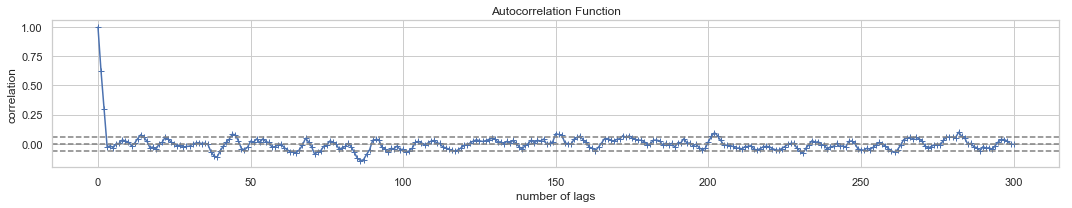

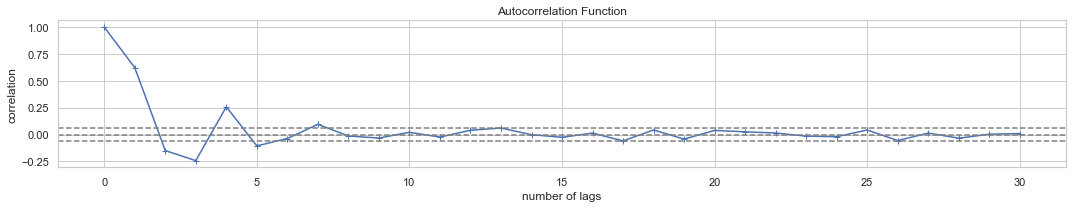

In [21]:
#calling auto correlation function
lag_acf = acf(y, nlags=300)
lag_pacf = pacf(y, nlags=30, method='ols')
#Plot PACF:
for i in [lag_acf,lag_pacf]:
    plt.figure(figsize=(15,3))
    plt.plot(i,marker='+')
    plt.axhline(y=0,linestyle='--',color='gray')
    #Confidence Band
    plt.axhline(y=-1.96/np.sqrt(len(y)),linestyle='--',color='gray')
    plt.axhline(y=1.96/np.sqrt(len(y)),linestyle='--',color='gray')
    plt.title('Autocorrelation Function' )
    plt.xlabel('number of lags')
    plt.ylabel('correlation')
    plt.tight_layout()

We find optimum features or order of the MA process using the ACF plot, as being an MA process it doesn’t have seasonal and trend components so we get only the residual relationship with the lags of time series in the ACF plot. ACF acting as a partial plot.